In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9
# le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme
# l’âge (age): l'âge du principal bénéficiaire
# le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance
# smoker : fumeur ou non-fumeur
# région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest
# charges : la prime d’assurance facturée (cible)

# Si l’IMC est :  entre 25,0 et 29,9 kg/m², il existe un surpoids ; 
# entre 30,0 et 34,9 kg/m², il s’agit d’obésité modérée ; entre 35,0 et 39,9 kg/m², 
# il s’agit d’une obésité sévère ; plus de 40 kg/m², on parle d’obésité massive.

df = pd.read_csv('dataset.csv')
df.head(25)


,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520
5,31,1,25.740,0,0,southeast,3756.62160
6,46,1,33.440,1,0,southeast,8240.58960
7,37,1,27.740,3,0,northwest,7281.50560
8,37,0,29.830,2,0,northeast,6406.41070
9,60,1,25.840,0,0,northwest,28923.13692


In [97]:
df.tail(25)

,age,sex,bmi,children,smoker,region,charges
1312,19,1,34.700,2,1,southwest,36397.57600
1313,30,1,23.655,3,1,northwest,18765.87545
1314,18,0,28.310,1,0,northeast,11272.33139
1315,19,1,20.600,0,0,southwest,1731.67700
1316,18,0,53.130,0,0,southeast,1163.46270
1317,35,0,39.710,4,0,northeast,19496.71917
1318,39,1,26.315,2,0,northwest,7201.70085
1319,31,0,31.065,3,0,northwest,5425.02335
1320,62,0,26.695,0,1,northeast,28101.33305
1321,62,0,38.830,0,0,southeast,12981.34570


In [98]:
print(df.shape)

# 1338 lignes
# 7 colonnes dont la variable cible (charges)

(1337, 7)


# Analyse Univariate

In [99]:
df.dtypes

age           int64
sex           int64
bmi         float64
children      int64
smoker        int64
region       object
charges     float64
dtype: object

In [100]:
df.describe()


,age,sex,bmi,children,smoker,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.495138,30.663452,1.095737,0.204936,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,4746.344000
50%,39.000000,0.000000,30.400000,1.000000,0.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


<Axes: >

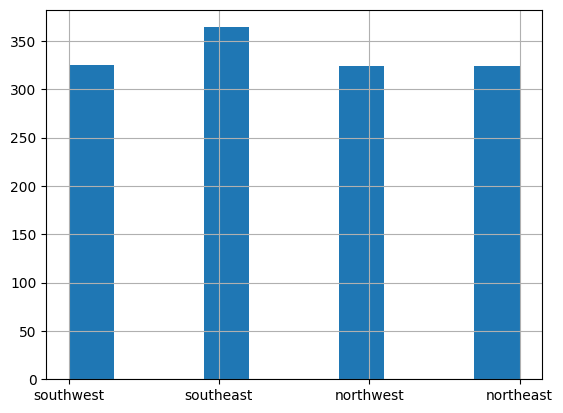

In [101]:
#focus variable region qui est categorielle
df['region'].hist()

In [102]:
region_describe = df['region'].describe()
count_region = df['region'].value_counts()

print(region_describe, count_region)



count          1337
unique            4
top       southeast
freq            364
Name: region, dtype: object region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64


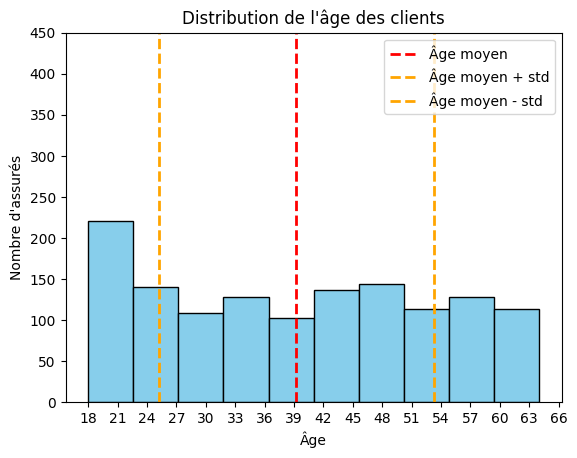

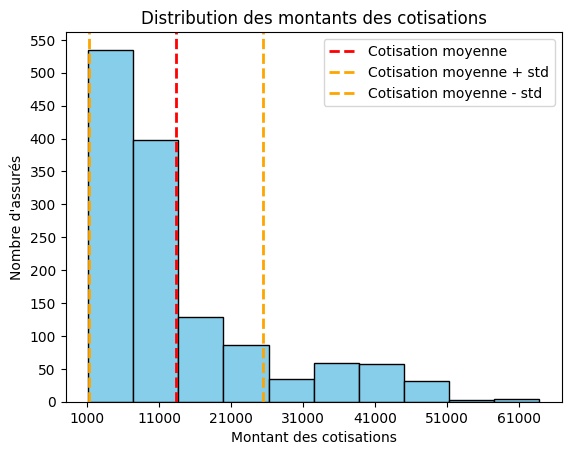

In [103]:
#focus sur l'age et sur les charges

# graph age moyen + std

plt.hist(df['age'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution de l\'âge des clients')
plt.xlabel('Âge')
plt.ylabel("Nombre d'assurés")
plt.axvline(df['age'].mean(), color='red', linestyle='dashed', linewidth=2, label='Âge moyen')  # Ligne verticale pour l'âge moyen
# Lignes verticales pour la moyenne ± la déviation standard
plt.axvline(df['age'].mean() + df['age'].std(), color='orange', linestyle='dashed', linewidth=2, label='Âge moyen + std')
plt.axvline(df['age'].mean() - df['age'].std(), color='orange', linestyle='dashed', linewidth=2, label='Âge moyen - std')
plt.legend()

# Ajuster l'échelle de l'axe Y pour avoir des valeurs entières
plt.yticks(range(0, 500, 50))  # Ajuster la plage en fonction de votre distribution

# Ajouter des étiquettes pour l'axe X
plt.xticks(range(18, 67, 3))  # Ajuster la plage en fonction de votre distribution

plt.show()



# graph montant charges + std

plt.hist(df['charges'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution des montants des cotisations')
plt.xlabel('Montant des cotisations')
plt.ylabel("Nombre d'assurés")
plt.axvline(df['charges'].mean(), color='red', linestyle='dashed', linewidth=2, label='Cotisation moyenne')  # Ligne verticale pour l'âge moyen
# Lignes verticales pour la moyenne ± la déviation standard
plt.axvline(df['charges'].mean() + df['charges'].std(), color='orange', linestyle='dashed', linewidth=2, label='Cotisation moyenne + std')
plt.axvline(df['charges'].mean() - df['charges'].std(), color='orange', linestyle='dashed', linewidth=2, label='Cotisation moyenne - std')
plt.legend()

# Ajuster l'échelle de l'axe Y pour avoir des valeurs entières
plt.yticks(range(0, 600, 50))  # Ajuster la plage en fonction de votre distribution

# Ajouter des étiquettes pour l'axe X
plt.xticks(range(1000, 64000, 10000))  # Ajuster la plage en fonction de votre distribution

plt.show()

stats age : 
count    1337.000000
mean       39.222139
std        14.044333
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
age
18    69
19    67
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
skew : 0.054780773126998195


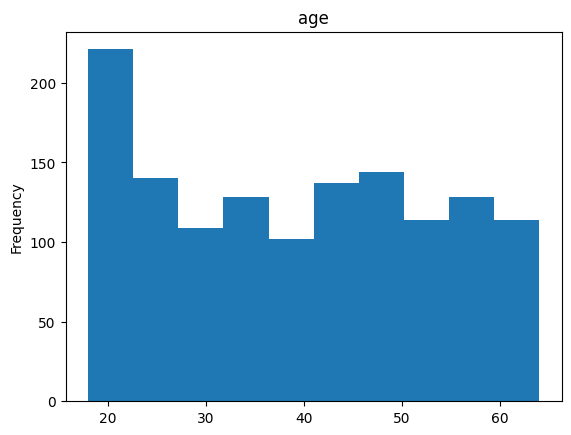

stats sex : 
count    1337.000000
mean        0.495138
std         0.500163
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64
sex
0    675
1    662
Name: count, dtype: int64
skew : 0.019469291079438414


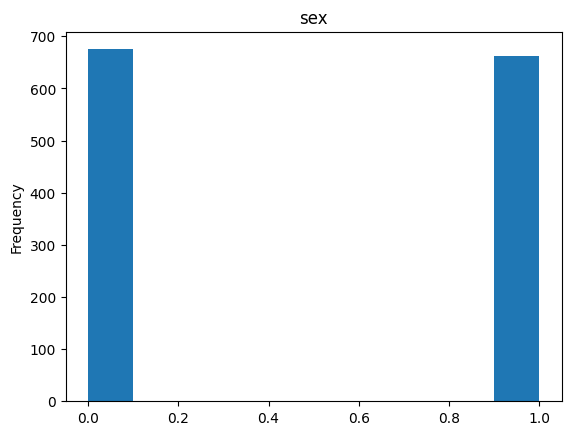

stats bmi : 
count    1337.000000
mean       30.663452
std         6.100468
min        15.960000
25%        26.290000
50%        30.400000
75%        34.700000
max        53.130000
Name: bmi, dtype: float64
bmi
32.30    13
28.31     9
30.80     8
31.35     8
28.88     8
         ..
46.20     1
23.80     1
44.77     1
32.12     1
30.97     1
Name: count, Length: 548, dtype: int64
skew : 0.28391419385321137


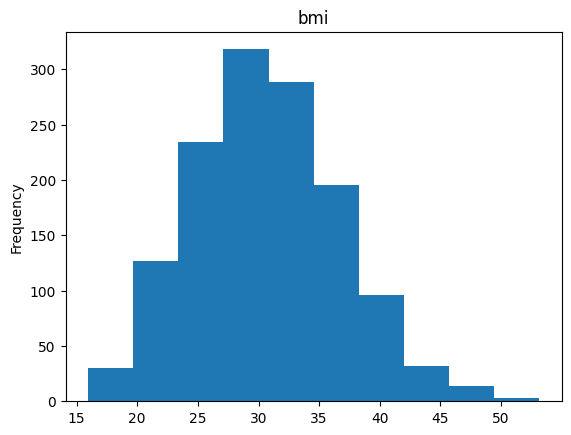

stats children : 
count    1337.000000
mean        1.095737
std         1.205571
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
children
0    573
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
skew : 0.9374206440474123


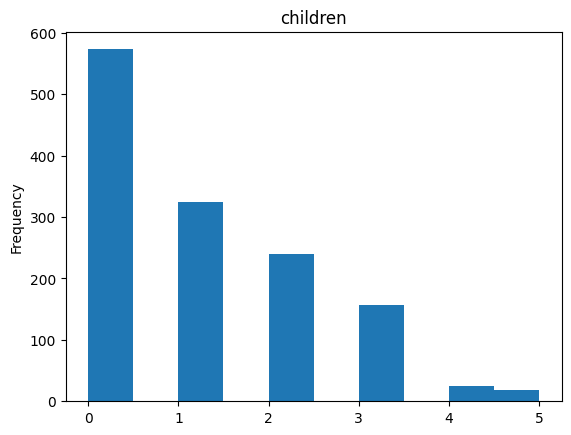

stats smoker : 
count    1337.000000
mean        0.204936
std         0.403806
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker, dtype: float64
smoker
0    1063
1     274
Name: count, dtype: int64
skew : 1.4636011988101756


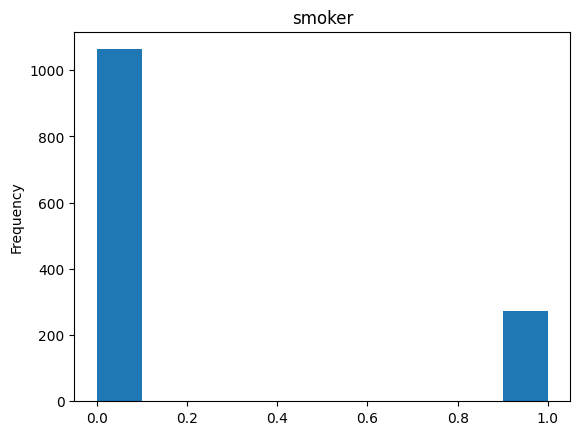

stats charges : 
count     1337.000000
mean     13279.121487
std      12110.359656
min       1121.873900
25%       4746.344000
50%       9386.161300
75%      16657.717450
max      63770.428010
Name: charges, dtype: float64
charges
16884.92400    1
2117.33885     1
2221.56445     1
19798.05455    1
13063.88300    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64
skew : 1.5153909108403483


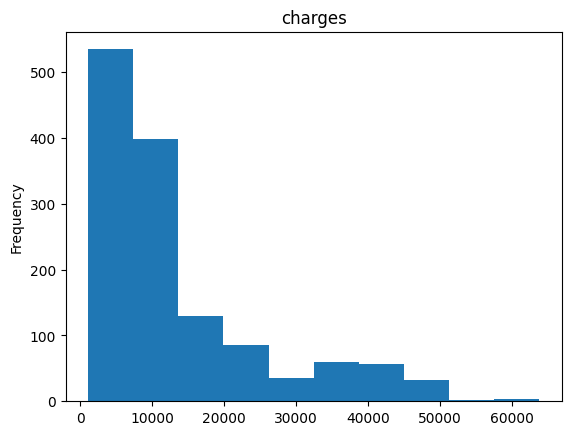

In [104]:
#focus sur toutes les variables une par une(sauf region) en faisant des hist pour voir la distribution et les stats

df_sans_region = df.drop('region', axis = 1)
 
for col in df_sans_region.columns:
  df_sans_region[col].plot(kind='hist')#kind='density' pour afficher une courbe plutot que des barres (on pourra voir les skewed), .plot() -> rien affiche baton par defaut
  plt.title(col)
  #ajouter des stats
  print(f'stats {col} : ')
  print(df_sans_region[col].describe())
  print(df_sans_region[col].value_counts())
  print('skew :', df_sans_region[col].skew())
  plt.show()#afficher le graphe

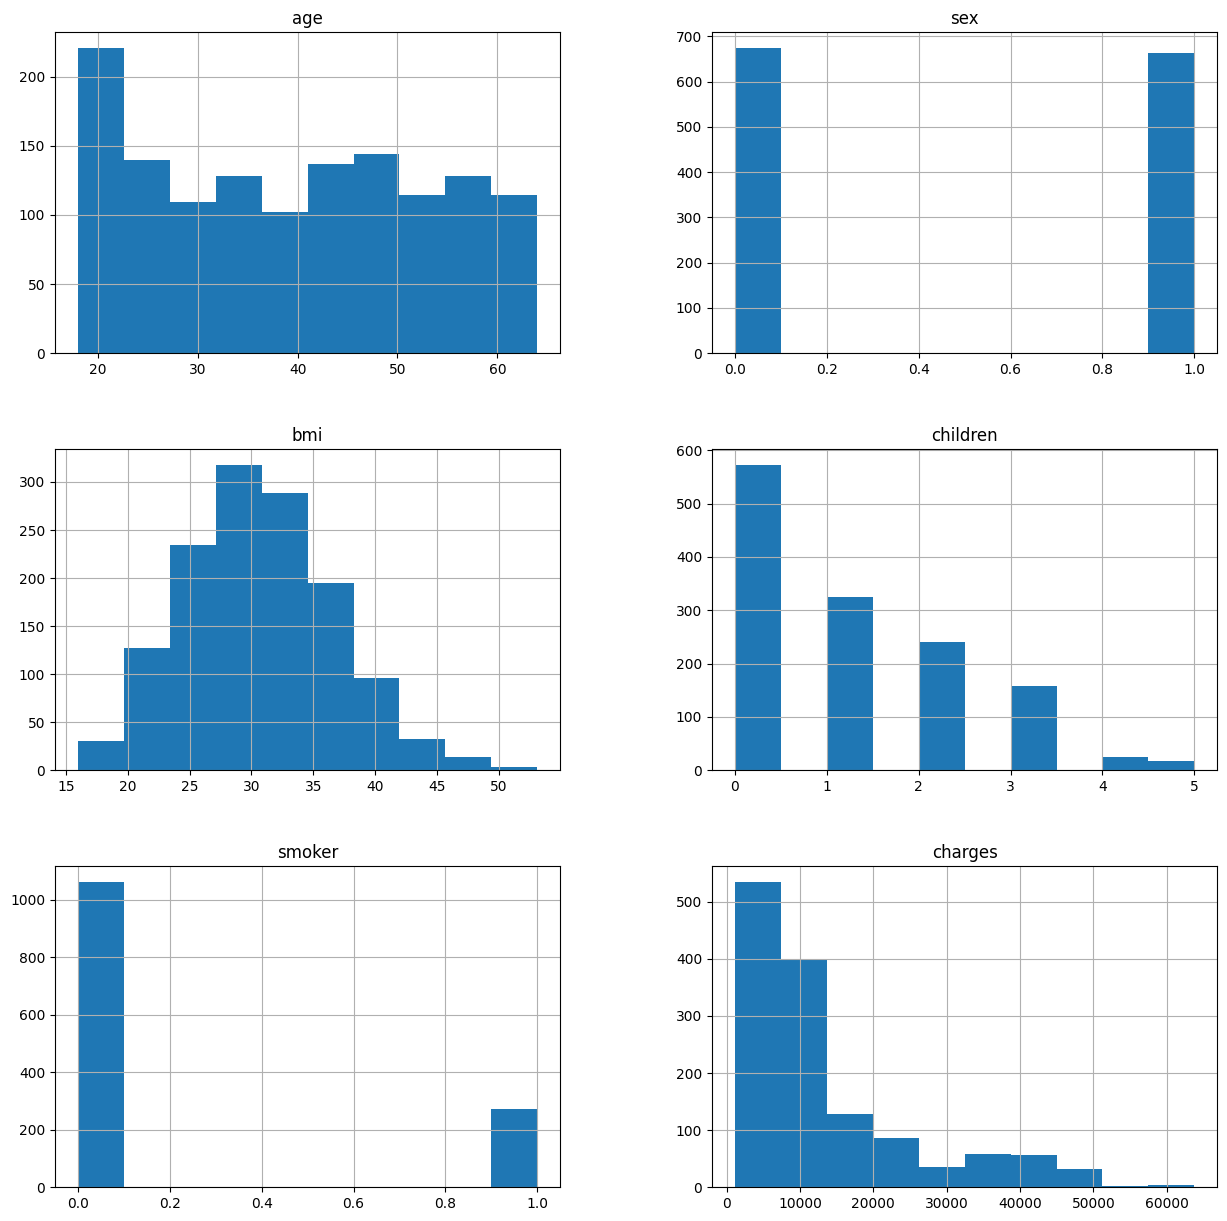

In [105]:
df.hist(figsize = (15,15));

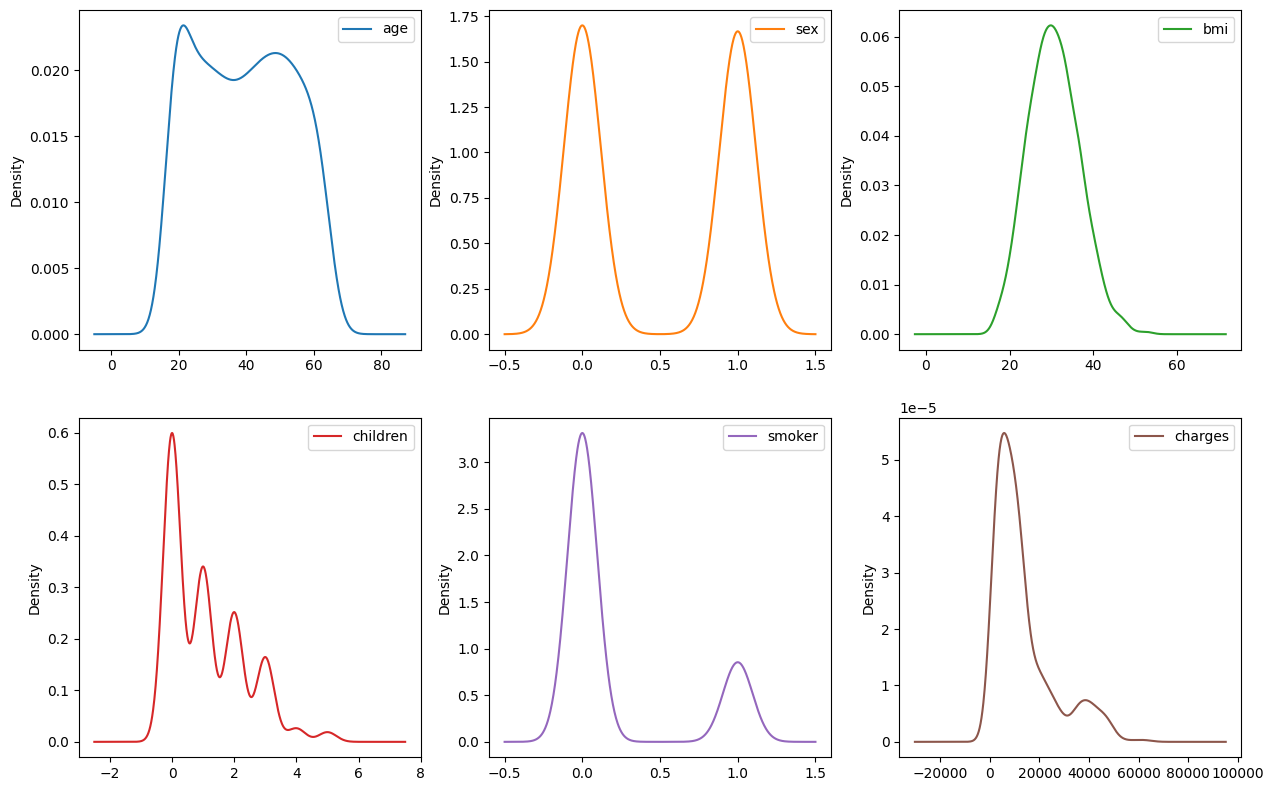

In [106]:
df.plot(kind='density',
          subplots=True,
          layout=(3,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          );

age            Axes(0.125,0.653529;0.227941x0.226471)
sex         Axes(0.398529,0.653529;0.227941x0.226471)
bmi         Axes(0.672059,0.653529;0.227941x0.226471)
children       Axes(0.125,0.381765;0.227941x0.226471)
smoker      Axes(0.398529,0.381765;0.227941x0.226471)
charges     Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

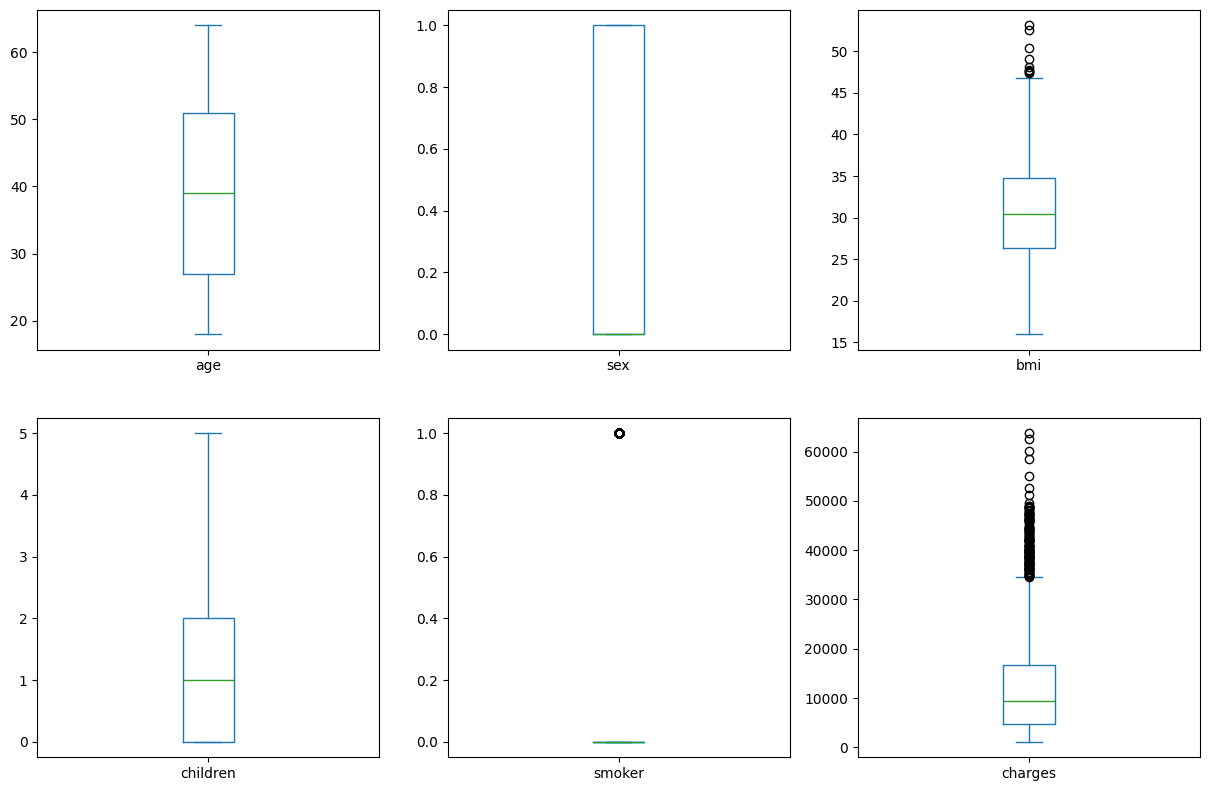

In [107]:
df.plot(kind='box',
          subplots=True,
          layout=(3,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

# Analyse Bivariate

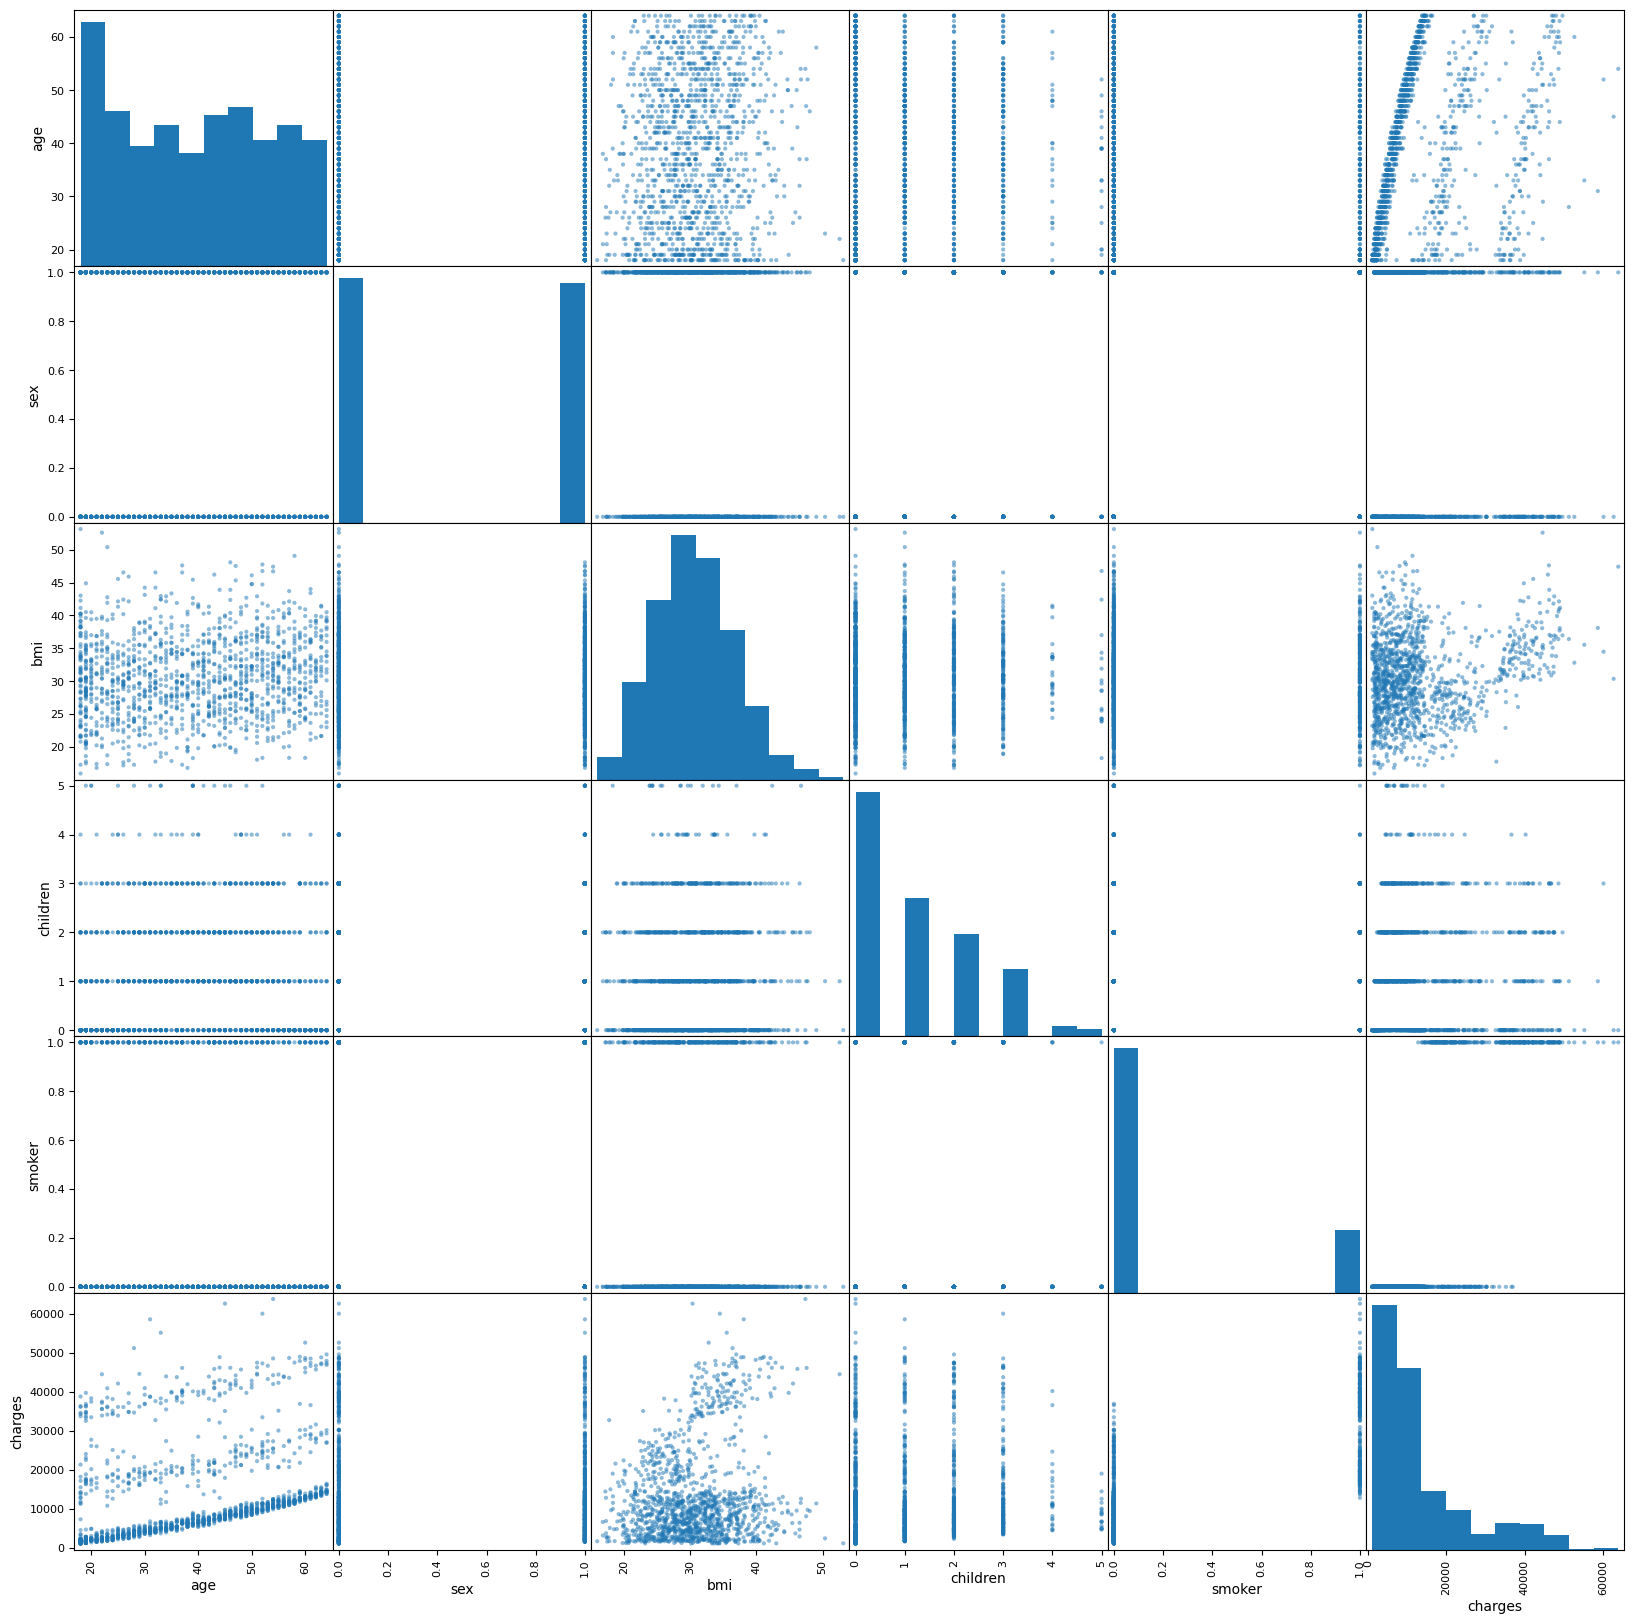

In [108]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20)); #possibilité d'ajouter alpha pour la transparence

Text(0.5, 1.0, 'smoker vs charges')

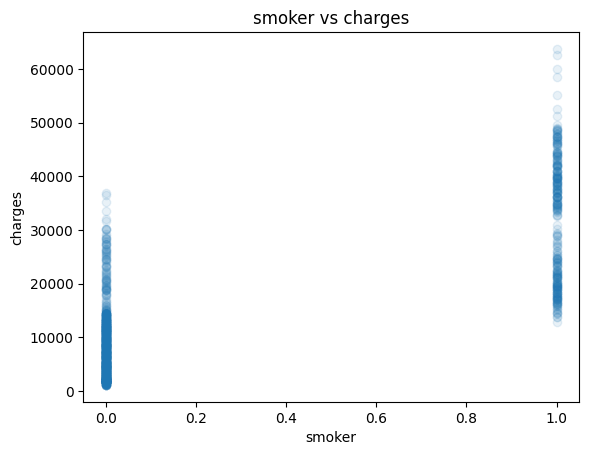

In [109]:
plt.scatter(x=df['smoker'], y=df['charges'], alpha=0.1)
plt.xlabel('smoker')
plt.ylabel('charges')
plt.title('smoker vs charges')

In [110]:
from scipy import stats

df2 = pd.read_csv('dataset2.csv')

charges_smokers = df2[df2['smoker'] == 'yes']['charges']
charges_non_smokers = df2[df2['smoker'] == 'no']['charges']

t_stat, p_value = stats.ttest_ind(charges_smokers, charges_non_smokers, equal_var=False)

print("Test t de Student pour comparer les charges entre fumeurs et non-fumeurs:")
print("T-statistique:", t_stat)
print("P-value:", p_value)

#objectif du test t est de déterminer s'il existe une différence significative entre les moyennes de deux groupes indépendants
#Ces groupes peuvent être des populations distinctes, des conditions expérimentales, ou tout autre classification binaire

# Le test calcule une statistique t, qui mesure la différence entre les moyennes en unités d'erreur standard
# La p-value associée à cette statistique t indique la probabilité d'observer une différence aussi grande
# ou plus grande que celle observée si l'hypothèse nulle était vraie.
# Une p-value faible (typiquement <0,05) indique que vous pouvez rejeter l'hypothèse nulle et conclure que les
# moyennes des deux groupes sont significativement différentes.

Test t de Student pour comparer les charges entre fumeurs et non-fumeurs:
T-statistique: 32.7423097372529
P-value: 6.261720774727631e-103


In [111]:
from scipy.stats import chi2_contingency
#autre test entre variable qualitative a deux valeurs et quantitative(smoker vs charges)
# catégorisation des charges en utilisant les quantiles (par exemple, en trois groupes)
df2['charges_cat'] = pd.qcut(df2['charges'], 3, labels=["faible", "moyenne", "élevée"])

# tableau de contingence
contingency_table = pd.crosstab(df2['smoker'], df2['charges_cat'])

# test du chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, contingency_table

# Ces résultats indiquent une association très significative entre le statut de fumeur et les catégories de charges. 
# La p-value extrêmement faible (bien en dessous de 0,05) suggère que l'association observée dans les données n'est 
# probablement pas due au hasard.

# Le tableau de contingence montre la répartition des fumeurs et non-fumeurs dans les différentes catégories de 
# charges (faible, moyenne, élevée). Nous observons que tous les fumeurs se trouvent dans la catégorie des charges "élevées"
#, et aucun dans les catégories "faible" ou "moyenne". Cela suggère un lien très fort entre le fait d'être fumeur et 
# d'avoir des charges élevées.

# En résumé, le test du chi-carré confirme qu'il existe une association statistiquement significative entre le statut
# de fumeur et le niveau des charges.

(688.4803521634767,
 3.1505841099220246e-150,
 charges_cat  faible  moyenne  élevée
 smoker                              
 no              446      445     172
 yes               0        0     274)

In [112]:
#(sex vs charges)
# catégorisation des charges en utilisant les quantiles (par exemple, en trois groupes)
df2['charges_cat'] = pd.qcut(df2['charges'], 3, labels=["faible", "moyenne", "élevée"])

# tableau de contingence
contingency_table = pd.crosstab(df2['sex'], df2['charges_cat'])

# test du chi-carré
chi2, p, dof, expected = chi2_contingency(contingency_table)

chi2, p, contingency_table

#pas d'association entre sex et charge

(2.0748014710318436,
 0.3543745991965019,
 charges_cat  faible  moyenne  élevée
 sex                                 
 female          221      231     210
 male            225      214     236)

Text(0.5, 1.0, 'age vs charges')

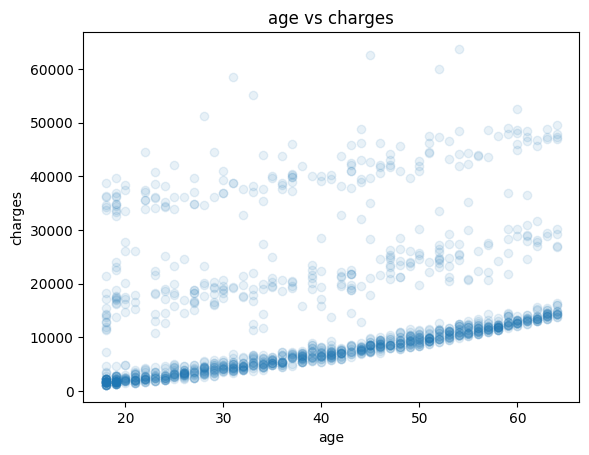

In [113]:
plt.scatter(x=df['age'], y=df['charges'], alpha=0.1)
plt.xlabel('age')
plt.ylabel('charges')
plt.title('age vs charges')


Text(0.5, 1.0, 'bmi vs charges')

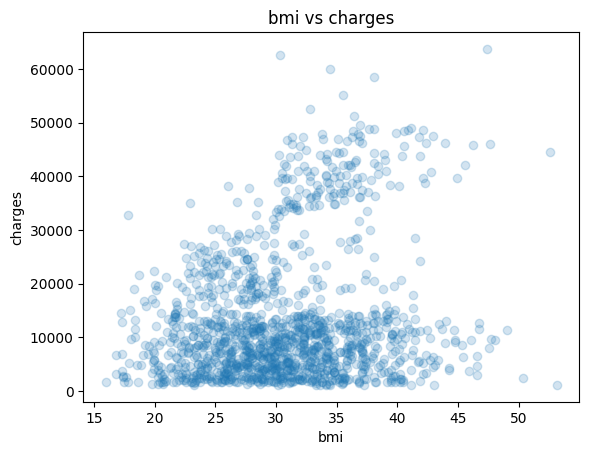

In [114]:
plt.scatter(x=df['bmi'], y=df['charges'], alpha=0.2)
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('bmi vs charges')

In [115]:
df_encoded = pd.get_dummies(df, columns=['region'])
df_encoded.head()


,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [116]:
df_encoded.rename(columns={'region_northeast': 'NE', 'region_northwest': 'NW'}, inplace=True)
df_encoded.rename(columns={'region_southeast': 'SE', 'region_southwest': 'SW'}, inplace=True)


In [117]:
correlations = df_encoded.corr()
correlations
#corrélations évidentes :

# on note qu'il y a une corrélation entre la charge et smoker
# entre l'age et les charges

# peu évident
# entre bmi et les charges 
# entre bmi et l'age

,age,sex,bmi,children,smoker,charges,NE,NW,SE,SW
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415
sex,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044,0.002008,0.012482,-0.017578,0.003767
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637
NE,0.001868,0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493
NW,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493
SE,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614
SW,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000


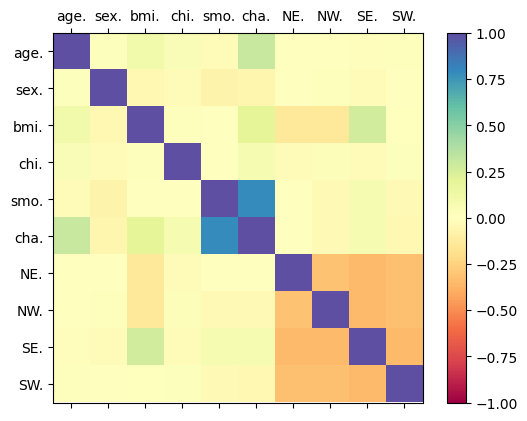

In [118]:
figure = plt.figure()#on créé le graphique vierge, poss. de mettre figsize en param

axe = figure.add_subplot(111)#subplot(111), vous créez essentiellement un seul graphique qui occupe toute la figure

corr = axe.matshow(correlations, vmin = -1, vmax= +1, cmap='Spectral')#tracer le graph, couleur etc

figure.colorbar(corr)#tracer la color bar a coté


#[legende]donner un nom aux ticks (à la place des 1 2 3 4 5 6 7 8 mettre le nom des colonnes)
# cols = data.columns
# axe.set_xticklabels(cols)
#les noms se s'empietent donc on va les raccourcir :
cols = [name[:3] + '.' for name in df_encoded.columns]
axe.set_xticks(range(0, len(cols)))
axe.set_xticklabels(cols)

axe.set_yticks(range(0, len(cols)))
axe.set_yticklabels(cols)
plt.show()

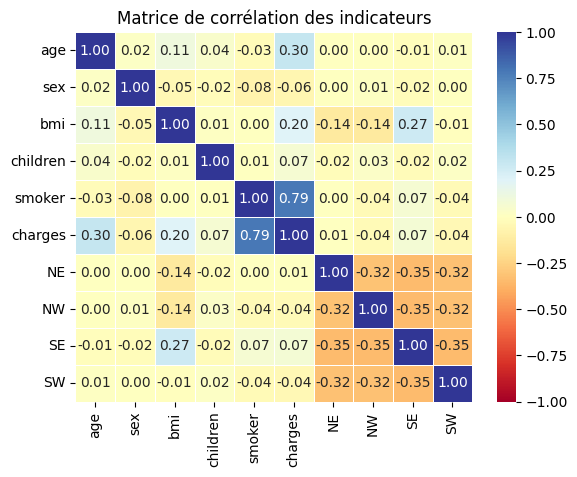

In [119]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(6.4, 4.8))

sns.heatmap(correlations, annot=True, fmt='.2f', vmin=-1, vmax=1,
annot_kws=None, linewidths=0.6, cmap='RdYlBu', ax=ax)

ax.set_title('Matrice de corrélation des indicateurs')

plt.show()

del fig, ax

F-value: 39.48593864487439
P-value: 1.9087293927440606e-24
   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
northeast northwest    0.022    1.0 -1.1608  1.2048  False
northeast southeast   4.1825    0.0  3.0326  5.3324   True
northeast southwest   1.4231 0.0107  0.2412   2.605   True
northwest southeast   4.1605    0.0  3.0106  5.3104   True
northwest southwest   1.4011 0.0125  0.2192   2.583   True
southeast southwest  -2.7594    0.0 -3.9083 -1.6104   True
----------------------------------------------------------


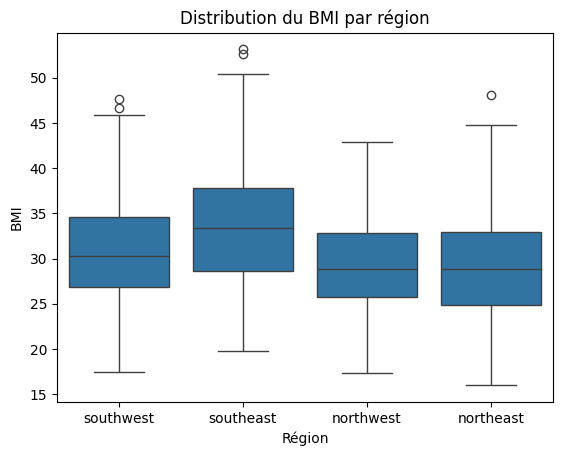

In [127]:
#autre moyen de faire une correlation d'une qualititative(categorielle) à quantitative 
# (methode sans passer par le corr et donc l'encodage des regions)
#si je veux voir l'impact des regions sur le bmi par exemple (comme on voit au dessus qu'il y a signification)

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Supposons que df est votre DataFrame
# Et 'region' et 'bmi' sont les colonnes dans df

# Réaliser l'ANOVA
f_value, p_value = stats.f_oneway(*[df[df['region'] == region]['bmi'] for region in df['region'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

# Si le P-value est inférieur à 0.05, réalisez des tests post-hoc
if p_value < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=df['bmi'], groups=df['region'], alpha=0.05)
    print(tukey_results)
    

  
# Interprétation des Résultats :

# Si la valeur de p obtenue est inférieure à votre seuil (généralement 0.05), 
# vous pouvez rejeter l'hypothèse nulle, indiquant qu'il y a une différence significative dans les moyennes du BMI entre les régions.
# Tests Post-Hoc (si nécessaire) :

# Si vous trouvez une différence significative, des tests post-hoc comme le test de Tukey peuvent être utilisés pour 
# déterminer entre quelles régions spécifiques les différences existent.

# Le tableau que vous avez fourni semble être le résultat d'une analyse statistique appelée test 
# de Tukey Honest Significant Difference (HSD). Cette analyse est souvent utilisée après une ANOVA pour faire 
# des comparaisons multiples entre les moyennes des groupes afin de déterminer les paires de groupes qui ont des moyennes 
# significativement différentes.

# créer un boxplot
sns.boxplot(x='region', y='bmi', data=df)

# Ajouter des titres et des labels
plt.title('Distribution du BMI par région')
plt.xlabel('Région')
plt.ylabel('BMI')

# Afficher le graphique
plt.show()



F-value: 2.926139903662776
P-value: 0.03276288025444947
       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -955.5437 0.7457 -3397.7353  1486.648  False
northeast southeast  1329.0269 0.4746 -1045.1237 3703.1776  False
northeast southwest -1059.4471 0.6793 -3499.7595 1380.8652  False
northwest southeast  2284.5706 0.0643     -89.58 4658.7212  False
northwest southwest  -103.9035 0.9995 -2544.2158 2336.4088  False
southeast southwest -2388.4741 0.0477 -4760.6915  -16.2567   True
-----------------------------------------------------------------


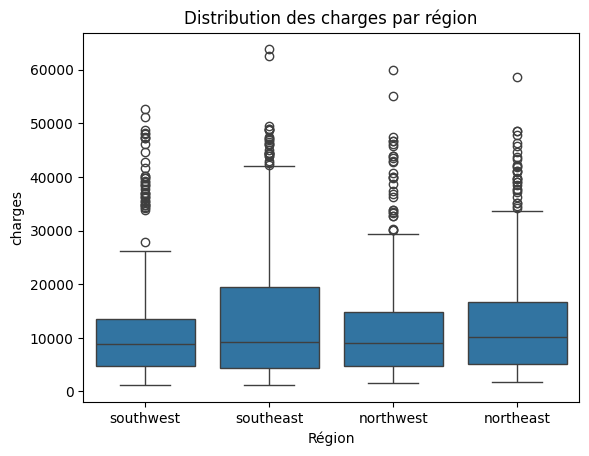

In [129]:
#autre moyen de faire une correlation d'une qualititative(categorielle) à quantitative 
# (methode sans passer par le corr et donc l'encodage des regions)
#si je veux voir l'impact des regions sur le bmi par exemple (comme on voit au dessus qu'il y a signification)

import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd


# Supposons que df est votre DataFrame
# Et 'region' et 'bmi' sont les colonnes dans df

# Réaliser l'ANOVA
f_value, p_value = stats.f_oneway(*[df[df['region'] == region]['charges'] for region in df['region'].unique()])

print('F-value:', f_value)
print('P-value:', p_value)

# Si le P-value est inférieur à 0.05, réalisez des tests post-hoc
if p_value < 0.05:
    tukey_results = pairwise_tukeyhsd(endog=df['charges'], groups=df['region'], alpha=0.05)
    print(tukey_results)
    

# créer un boxplot
sns.boxplot(x='region', y='charges', data=df)

# Ajouter des titres et des labels
plt.title('Distribution des charges par région')
plt.xlabel('Région')
plt.ylabel('charges')

# Afficher le graphique
plt.show()



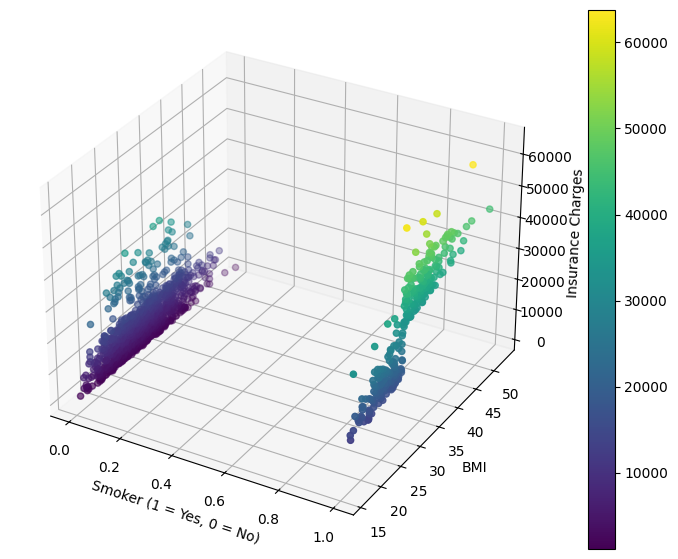

In [121]:
# 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['smoker'], df['bmi'], df['charges'], c=df['charges'], cmap='viridis')

ax.set_xlabel('Smoker (1 = Yes, 0 = No)')
ax.set_ylabel('BMI')
ax.set_zlabel('Insurance Charges')

plt.colorbar(sc)

plt.show()

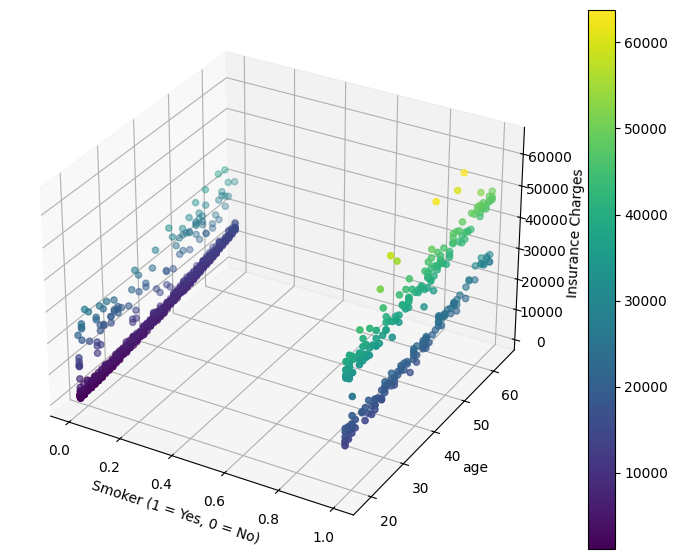

In [122]:

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(df['smoker'], df['age'], df['charges'], c=df['charges'], cmap='viridis')

ax.set_xlabel('Smoker (1 = Yes, 0 = No)')
ax.set_ylabel('age')
ax.set_zlabel('Insurance Charges')

plt.colorbar(sc)

plt.show()

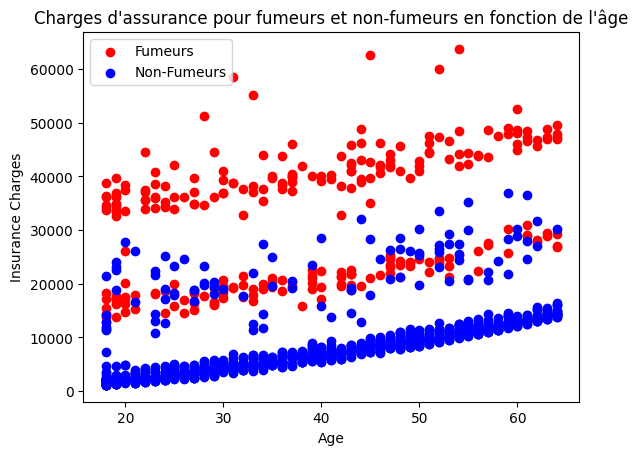

In [123]:
#en 2D
fumeurs = df[df['smoker'] == 1]
non_fumeurs = df[df['smoker'] == 0]

fig, ax = plt.subplots()

# tracage des points pour les fumeurs en une couleur 
sc1 = ax.scatter(fumeurs['age'], fumeurs['charges'], color='red', label='Fumeurs')

# tracage des points pour les non-fumeurs 
sc2 = ax.scatter(non_fumeurs['age'], non_fumeurs['charges'], color='blue', label='Non-Fumeurs')

ax.set_xlabel('Age')
ax.set_ylabel('Insurance Charges')

# legende
ax.legend()
plt.title("Charges d'assurance pour fumeurs et non-fumeurs en fonction de l'âge")
plt.show()



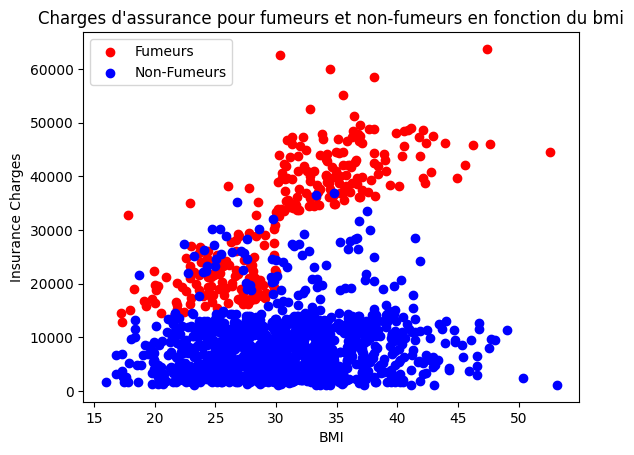

In [124]:
#en 2D
fumeurs = df[df['smoker'] == 1]
non_fumeurs = df[df['smoker'] == 0]

fig, ax = plt.subplots()

# tracage des points pour les fumeurs 
sc1 = ax.scatter(fumeurs['bmi'], fumeurs['charges'], color='red', label='Fumeurs')

# tracage des points pour les non-fumeurs 
sc2 = ax.scatter(non_fumeurs['bmi'], non_fumeurs['charges'], color='blue', label='Non-Fumeurs')

ax.set_xlabel('BMI')
ax.set_ylabel('Insurance Charges')
#legende
ax.legend()
plt.title("Charges d'assurance pour fumeurs et non-fumeurs en fonction du bmi")
plt.show()

